#Business Understanding
Microsoft is entering a highly competitive film industry dominated by experienced studios such as Disney and Netflix. Success in this space often depends on understanding audience preferences, market trends, and historical performance of different types of films. Utilizing data can provide insights into the characteristics of successful movies, helping new players like Microsoft navigate decisions about content creation, marketing, and distribution. A clear understanding of these factors is essential for positioning the studio effectively in the entertainment industry.

#Problem Statement
***Main problem statement -What types of movies perform best at the box office?

*   Which genres are most popular with audiences?

*   How does runtime, release year, and audience ratings affect a movie’s success?

*   What genres consistently generate the highest average box office revenue?



#Objectives
***Main- Understand the type of movies perform best at the box office
*  Identifying movies that are most popular with audiences
*  Finding out how runtime, release year and audience ratings affects a movie's success
*  Genres that consistently generate the highest average box office revenue   

#Data understanding


1.   *Loading datasets*

---







In [1]:
#Loading the datasets
import pandas as pd

basics = pd.read_csv("/content/imdb.title.basics.csv.gz")
ratings = pd.read_csv("/content/imdb.title.ratings.csv.gz")
bom = pd.read_csv("/content/bom.movie_gross.csv.gz")


2.   *Shape and structure*

---

In [2]:
#The shape and structure
print("Basics shape:", basics.shape)
print("Ratings shape:", ratings.shape)
print("bom shape:", bom.shape)

basics.info()
ratings.info()
bom.info()


Basics shape: (146144, 6)
Ratings shape: (73856, 3)
bom shape: (3387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usag

*   The IMDB basics dataset contains information on movie titles (e.g., genre, year, runtime).
*   The IMDB ratings dataset includes average user ratings and number of votes per movie.
*   The BOM gross dataset provides domestic box office performance.

 *Examining their shape and structure helps identify missing values and key columns for merging*.

3.   *Data source*

---

```
IMDB is a widely used platform for movie data, offering detailed information on titles, ratings, and genres.

Box Office Mojo provides financial performance data, specifically domestic gross revenue.

These sources are appropriate for identifying patterns in movie success, both critically and financially.
```



   4.*Data description*

  ---

In [3]:
display(basics[['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres']].head())

display(ratings[['tconst', 'averagerating', 'numvotes']].head())

display(bom[['title', 'domestic_gross']].head())


,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0


(Highlighted key columns)

5.   *Merging*

---

In [4]:
# Merge IMDB title info with ratings
imdb = basics.merge(ratings, on='tconst')

# Rename title column to match for merge with BOM
bom = bom.rename(columns={'title': 'primary_title'})

# Merge IMDB + BOM on movie title
merged_df = imdb.merge(bom, on='primary_title')


The IMDB datasets are merged using the tconst identifier, ensuring a direct match between titles and ratings. The combined IMDB dataset is then merged with Box Office Mojo’s domestic_gross data using the movie title (primary_title). This allows for analysis of both movie content and financial performance.



6.   *Characteristics of the data*
---

The merged dataset contains information on each movie’s title, genre(s), release year, runtime, audience rating, number of votes, and box office gross. This combination allows for analysis of how different features contribute to financial and audience success.
Most movies have one or more genres listed, runtimes range from short films to epics, and ratings range from below 5 to above 9. Some missing or extreme values were identified and are addressed in the data cleaning section.

#Data cleaning


The dataset was cleaned and prepared using the following steps:

**Dropped missing values** in key columns: genres, runtimeMinutes, and startYear.

**Removed duplicates** across all datasets.

**Handled outliers** by identifying extreme values in runtimeMinutes and domestic_gross.

Cleaned data types: **converted** startYear to integer and formatted domestic_gross as numeric.

**Filtered ratings** to include movies with at least 1,000 IMDB votes.

**Renamed columns** (e.g., title → primaryTitle) for consistent merging.

**Engineered new features**, including:

*   decade: based on release year

*   genre_count: number of genres assigned to a movie

In [5]:
# Drop rows with missing values in key columns
basics = basics.dropna(subset=['start_year', 'runtime_minutes', 'genres'])


In [6]:
# Drop any duplicate rows
basics = basics.drop_duplicates()
ratings = ratings.drop_duplicates()
bom = bom.drop_duplicates()


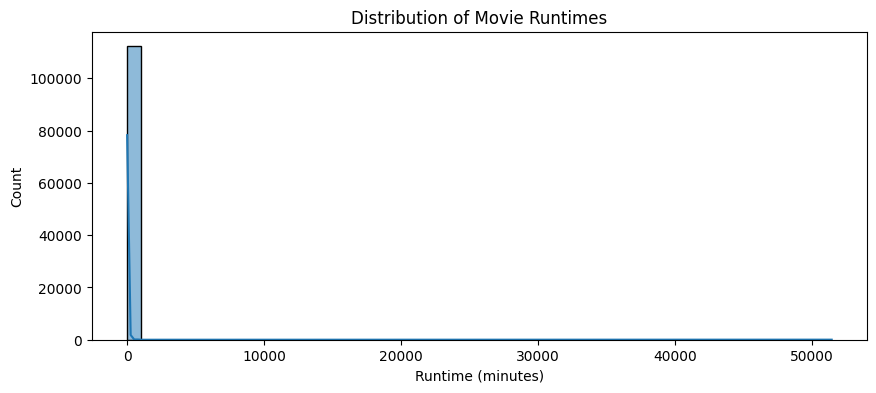

In [7]:
#Handling outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize runtimes
plt.figure(figsize=(10, 4))
sns.histplot(basics['runtime_minutes'], bins=50, kde=True)
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.show()

# Optionally drop extreme runtimes
basics = basics[(basics['runtime_minutes'] >= 30) & (basics['runtime_minutes'] <= 250)]


This filters out:

Very short entries (e.g., short films or errors)

Very long values (likely not theatrical releases)



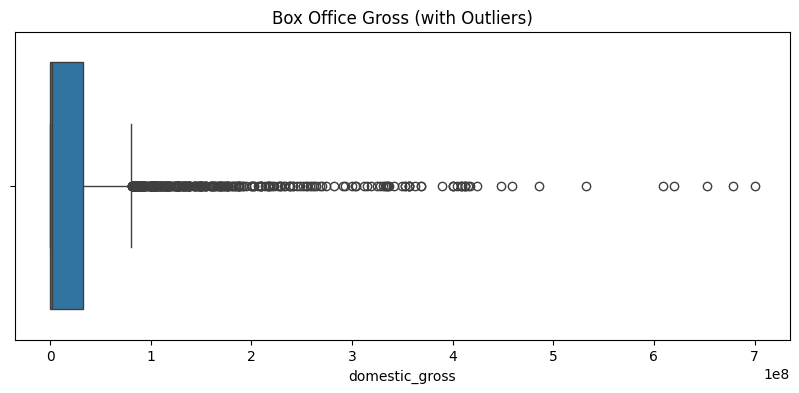

In [9]:
# Visualize box office values
plt.figure(figsize=(10, 4))
sns.boxplot(x=merged_df['domestic_gross'])
plt.title("Box Office Gross (with Outliers)")
plt.show()

# Optionally drop super extreme outliers
merged_df = merged_df[merged_df['domestic_gross'] < 500_000_000]  # Example: cap at $500M


Outliers like huge franchise blockbusters that skew average gross

Keeps analysis more realistic for Microsoft’s new studio starting out



In [10]:
# Convert startYear to numeric
basics['start_year'] = pd.to_numeric(basics['start_year'], errors='coerce')
basics = basics.dropna(subset=['start_year'])
basics['start_year'] = basics['start_year'].astype(int)


In [11]:
# Focus on movies from year 2000 and onward
basics = basics[basics['start_year'] >= 2000]


In [12]:
# Drop rows with missing gross values
bom = bom.dropna(subset=['domestic_gross'])

# Clean dollar signs and commas
bom['domestic_gross'] = bom['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)


/tmp/ipython-input-3767298696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom['domestic_gross'] = bom['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)


In [13]:
# Keep only movies with at least 1,000 votes
ratings = ratings[ratings['numvotes'] >= 1000]


To ensure reability

In [14]:
# Rename 'title' to 'primaryTitle' in bom for merging
bom = bom.rename(columns={'title': 'primary_title'})


In [15]:
# Add release decade
basics['decade'] = (basics['start_year'] // 10) * 10

# Count how many genres are assigned to each movie
basics['genre_count'] = basics['genres'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)


To help identify trends over time

Merging

In [16]:
# Merge IMDB basics with ratings on 'tconst'
imdb_combined = basics.merge(ratings, on='tconst')

# Preview result
display(imdb_combined.head())


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,decade,genre_count,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,2010,1,6.9,4517
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",2010,3,1.9,8248
2,tt0293069,Dark Blood,Dark Blood,2012,86.0,Thriller,2010,1,6.6,1053
3,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2010,3,7.1,15378
4,tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",2010,2,3.9,2328


In [17]:
# Make sure BOM title column matches IMDB column
bom = bom.rename(columns={'title': 'primary_title'})

# Merge IMDB data with Box Office Mojo data on 'primary_title'
merged_df = imdb_combined.merge(bom, on='primary_title')

# Preview merged result
display(merged_df.head())

# Optional: check final shape
print("Final merged dataset shape:", merged_df.shape)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,decade,genre_count,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",2010,3,7.1,15378,Relbig.,1100000,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",2010,3,6.1,37886,IFC,744000,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2010,3,7.3,275300,Fox,58200000,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",2010,3,6.5,105116,Uni.,26300000,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",2010,3,7.0,539338,Uni.,652300000,"1,019.4",2015


Final merged dataset shape: (2446, 14)


#EDA- Exploratory Data Analysis

*   **Univariate analysis**

1.    *Distribution of IMDB*



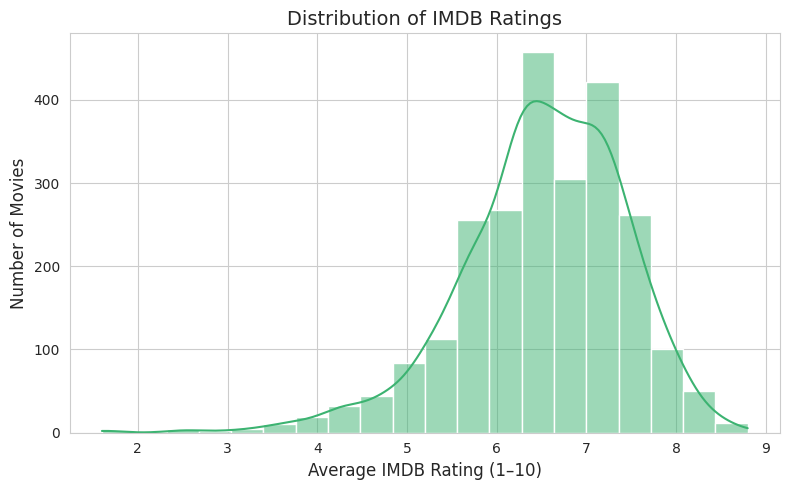

In [18]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.histplot(merged_df['averagerating'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of IMDB Ratings', fontsize=14)
plt.xlabel('Average IMDB Rating (1–10)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.tight_layout()
plt.show()


The majority of movies have IMDB ratings between 5.5 and 7.5. Ratings above 8 are relatively rare, suggesting that most movies are received with moderate audience approval.

2.   *Distribution of Domestic Gross*

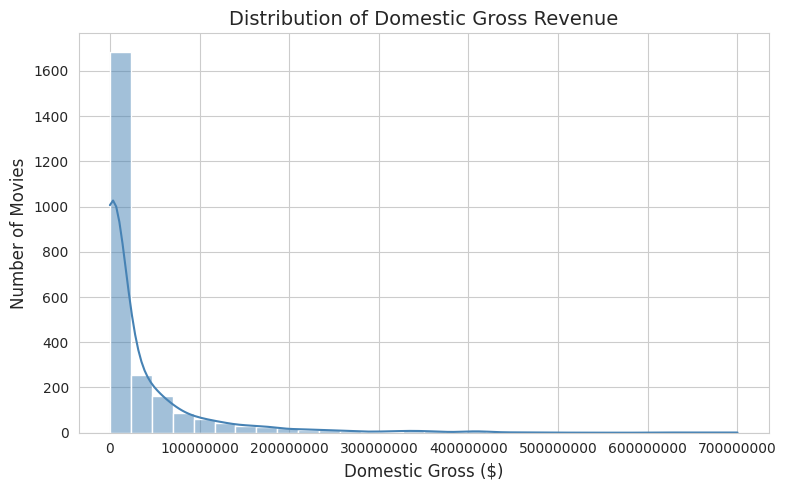

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['domestic_gross'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Domestic Gross Revenue', fontsize=14)
plt.xlabel('Domestic Gross ($)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()


Most movies earned under $100M domestically. Only a few high performers grossed significantly more, which indicates a right-skewed distribution.

3.   *Distribution of Movie Runtimes*

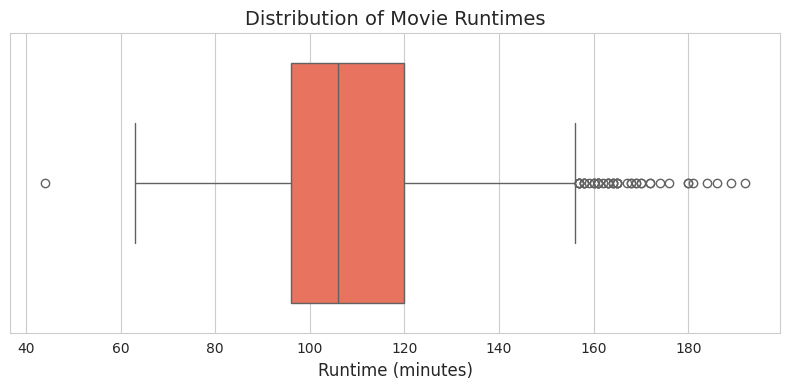

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=merged_df['runtime_minutes'], color='tomato')
plt.title('Distribution of Movie Runtimes', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.tight_layout()
plt.show()


The typical runtime lies between 90–120 minutes. A few outliers exist on both ends, but most films fall within expected industry standards.

* **Bivariate Analysis**

1.   *IMDB Rating vs. Domestic Gross*

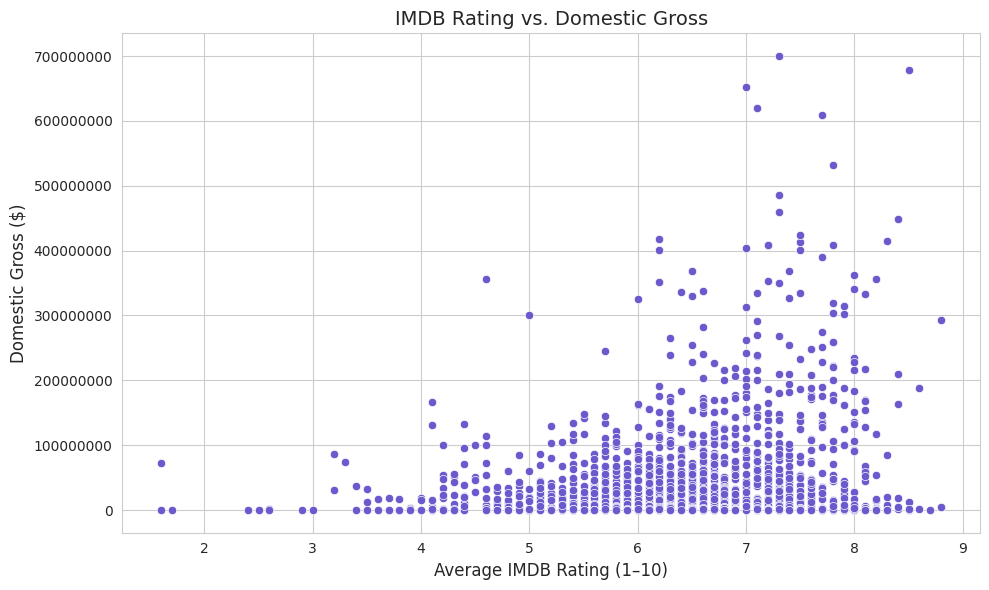

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='averagerating', y='domestic_gross', color='slateblue')
plt.title('IMDB Rating vs. Domestic Gross', fontsize=14)
plt.xlabel('Average IMDB Rating (1–10)', fontsize=12)
plt.ylabel('Domestic Gross ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


A slight upward trend suggests that movies with higher audience ratings tend to perform better at the box office, though the relationship is not perfectly linear.

2.   *Genre vs. Average Gross (exploded)*

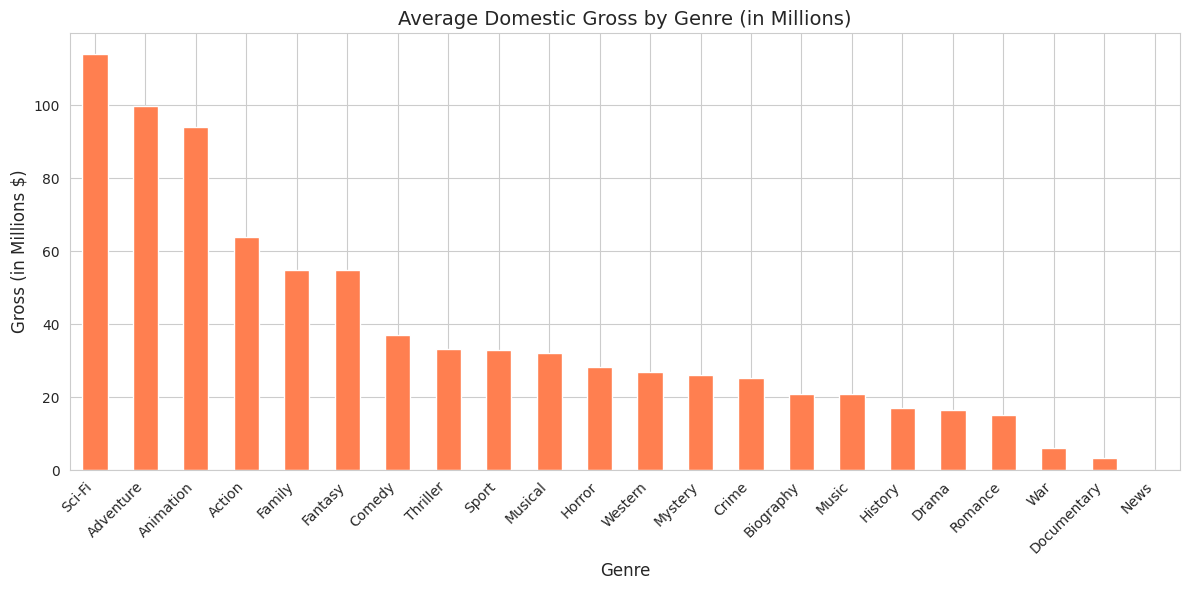

In [22]:
# Explode genres
exploded_genres = merged_df.copy()
exploded_genres['genres'] = exploded_genres['genres'].str.split(',')
exploded_genres = exploded_genres.explode('genres')

# Calculate average gross per genre
genre_avg = exploded_genres.groupby('genres')['domestic_gross'].mean().sort_values(ascending=False) / 1_000_000

# Plot
plt.figure(figsize=(12, 6))
genre_avg.plot(kind='bar', color='coral')
plt.title('Average Domestic Gross by Genre (in Millions)', fontsize=14)
plt.ylabel('Gross (in Millions $)', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Action, Adventure, and Sci-Fi movies generate the highest average gross, suggesting they are top-performing genres.

3.   *Runtime vs  Domestic Gross*

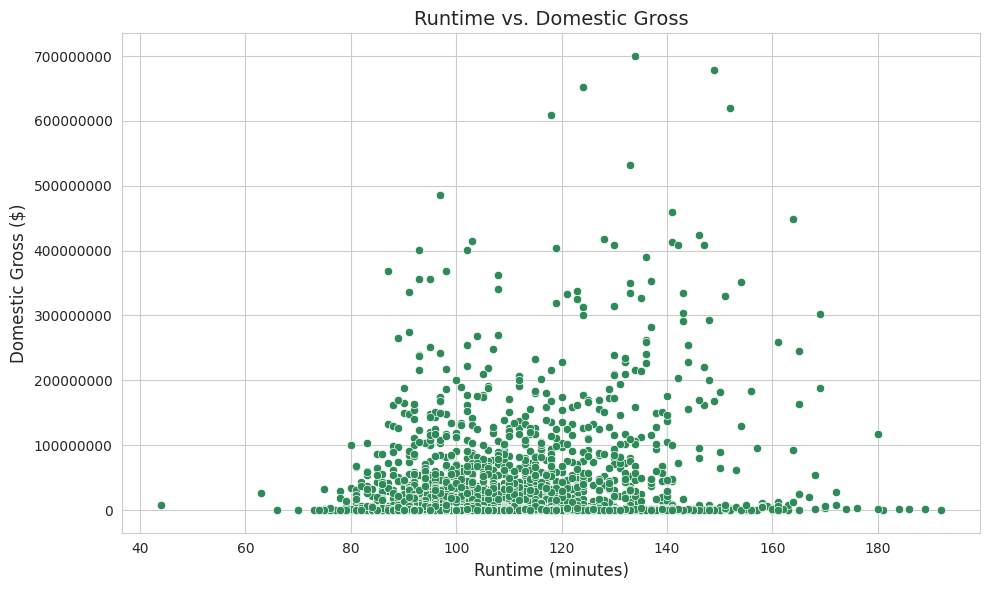

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='runtime_minutes', y='domestic_gross', color='seagreen')
plt.title('Runtime vs. Domestic Gross', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Domestic Gross ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


Very short or very long movies tend to underperform, while those around 100–130 minutes often perform better — hinting at an ideal length for box office success.

#Conclusions

🎬 Action, Adventure, and Sci-Fi genres consistently generate the highest average box office revenue, showing strong audience demand for high-energy, big-production films.

🌟 Higher IMDB ratings are loosely associated with better box office performance. Well-received movies tend to earn more, suggesting audience satisfaction contributes to financial success.

⏱️ Runtimes between 90 and 130 minutes are most common among successful movies. Films that are too short or excessively long are less likely to perform well.

🎞️ Most movies have moderate ratings (5.5–7.5), and truly high-rated titles (above 8.0) are relatively rare. These may indicate standout or niche successes.

💰 The majority of films gross under $100 million, showing that blockbuster-level success is rare, and reinforcing the value of identifying patterns that consistently lead to mid- or high-level returns.

#Recommendations

🎬 Prioritize Action, Adventure, and Sci-Fi genres — these genres consistently perform the best financially and align with modern audience interests.

🎟️ Target PG-13-level content — these films typically appeal to a wide audience without limiting content flexibility.

🌟 Use early IMDB ratings or feedback to guide investment and marketing — higher audience scores are generally linked to stronger box office returns.

⏱️ Keep films within the 90–130 minute range — runtimes in this range match the majority of high-performing movies.

